In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load dataset
file_path = "/content/batter_player_stats.csv" # Assuming it's in /content/data
df = pd.read_csv(file_path)
# Encode categorical columns if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting features and target
X = df.drop(columns=['total_runs'])  # Use actual target column
y = df['total_runs']

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
print(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1. Decision Tree Regressor**
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

[[1474.            0.           91.70381212 ...   41.
     6.         1969.14285714]
 [ 679.            0.           79.39046057 ...   26.
    19.          157.86686231]
 [1110.            0.           90.35817348 ...   23.
     6.          967.81818182]
 ...
 [1323.            0.            0.         ...    0.
    21.          157.86686231]
 [ 515.            0.            0.         ...    0.
    15.          157.86686231]
 [1375.            0.            0.         ...    0.
    15.          157.86686231]]

Decision Tree Regression Metrics:
MSE: 16436.376623376622
R2 Score: 0.9853156723680528


In [3]:
### **2. Random Forest Regressor**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [4]:
### **3. Linear Regression**
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

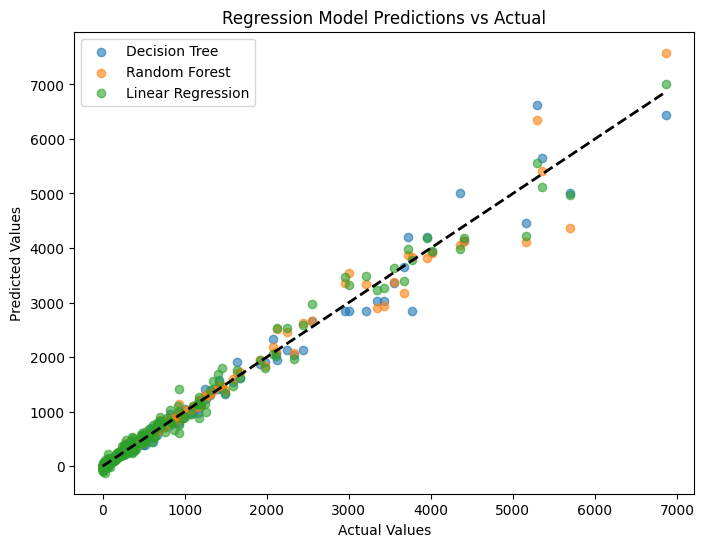

In [5]:
### **4. Combined Regression Scatter Plot**
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Model Predictions vs Actual")
plt.legend()
plt.show()


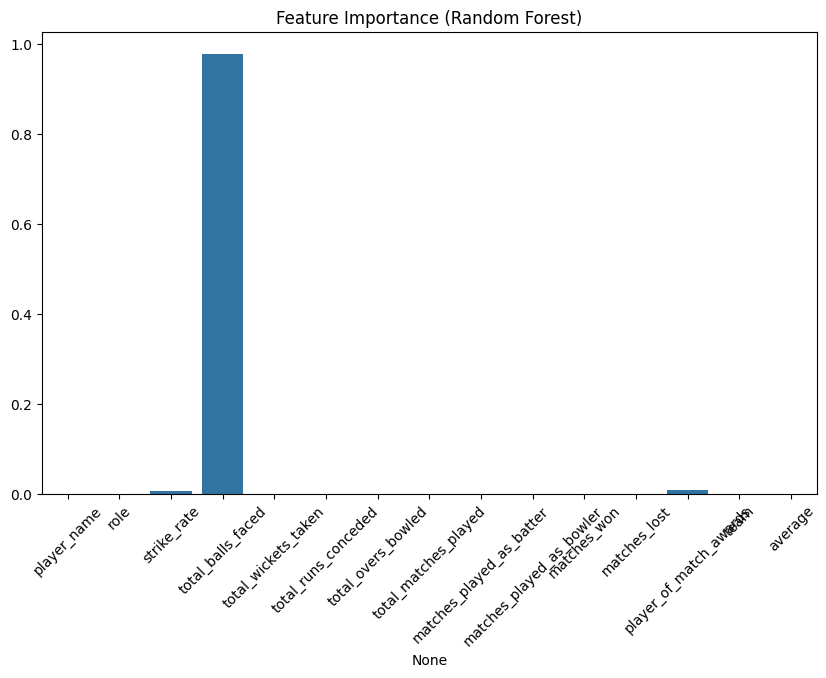

In [6]:
### **6. Feature Importance (for Random Forest)**
plt.figure(figsize=(10, 6))
sns.barplot(x=df.drop(columns=['total_runs']).columns, y=rf_model.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [30]:
# prompt: remove out layers from above data

# Assuming 'outliers' are defined as data points beyond a certain threshold
# from the mean.  You'll need to adjust the threshold based on your data.

# Calculate the mean and standard deviation of the target variable
mean_runs = df['total_runs'].mean()
std_runs = df['total_runs'].std()

# Define a threshold (e.g., 2 standard deviations from the mean)
threshold = 2

# Identify outliers
outlier_indices = df[(df['total_runs'] > mean_runs + threshold * std_runs) |
                     (df['total_runs'] < mean_runs - threshold * std_runs)].index

# Remove outliers from the DataFrame
df_no_outliers = df.drop(outlier_indices)

# Now, re-run your model training and evaluation using df_no_outliers instead of df
# ... (rest of the code using df_no_outliers) ...

# Example re-running part of the code with the outlier removed data:
X_no_outliers = df_no_outliers.drop(columns=['total_runs'])
y_no_outliers = df_no_outliers['total_runs']

# Encode categorical columns (you might need to re-encode if the categories are different)
for col in X_no_outliers.select_dtypes(include=['object']).columns:
    if col in label_encoders:
      X_no_outliers[col] = label_encoders[col].transform(X_no_outliers[col])

#Impute the values
imputer_no_outliers = SimpleImputer(strategy='mean')
X_no_outliers = imputer_no_outliers.fit_transform(X_no_outliers)

# Split data again
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

#Retrain with the new dataset
rf_model_no_outliers = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_rf_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

#Evaluation
print("\nRandom Forest Regression Metrics (No Outliers):")
print("MSE:", mean_squared_error(y_test_no_outliers, y_pred_rf_no_outliers))
print("R2 Score:", r2_score(y_test_no_outliers, y_pred_rf_no_outliers))



ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'G Toka'

Skewness of player_name: 0.0
Kurtosis of player_name: -1.2000010119754645
Skewness of role: nan
Kurtosis of role: nan
Skewness of total_runs: 4.117310071947919
Kurtosis of total_runs: 22.17691910485034
Skewness of strike_rate: 0.7718638037607622
Kurtosis of strike_rate: 7.574069734702915
Skewness of total_balls_faced: 3.869565808418151
Kurtosis of total_balls_faced: 19.36285765789031
Skewness of total_wickets_taken: 4.560091839765628
Kurtosis of total_wickets_taken: 28.537875340425206
Skewness of total_runs_conceded: 4.278791175499005
Kurtosis of total_runs_conceded: 24.7793384217693
Skewness of total_overs_bowled: 4.136232263938785
Kurtosis of total_overs_bowled: 22.208627662487473
Skewness of total_matches_played: -0.1313342355085812
Kurtosis of total_matches_played: -1.5634371435052494
Skewness of matches_played_as_batter: -0.1313342355085812
Kurtosis of matches_played_as_batter: -1.5634371435052494
Skewness of matches_played_as_bowler: nan
Kurtosis of matches_played_as_bowler: nan


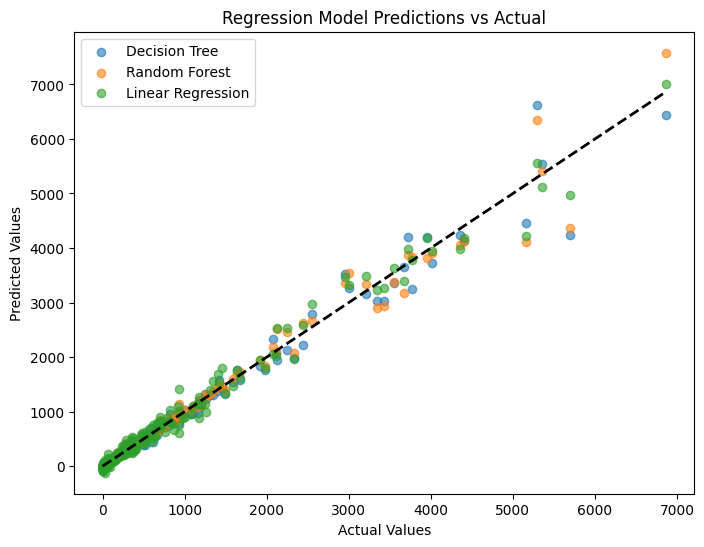

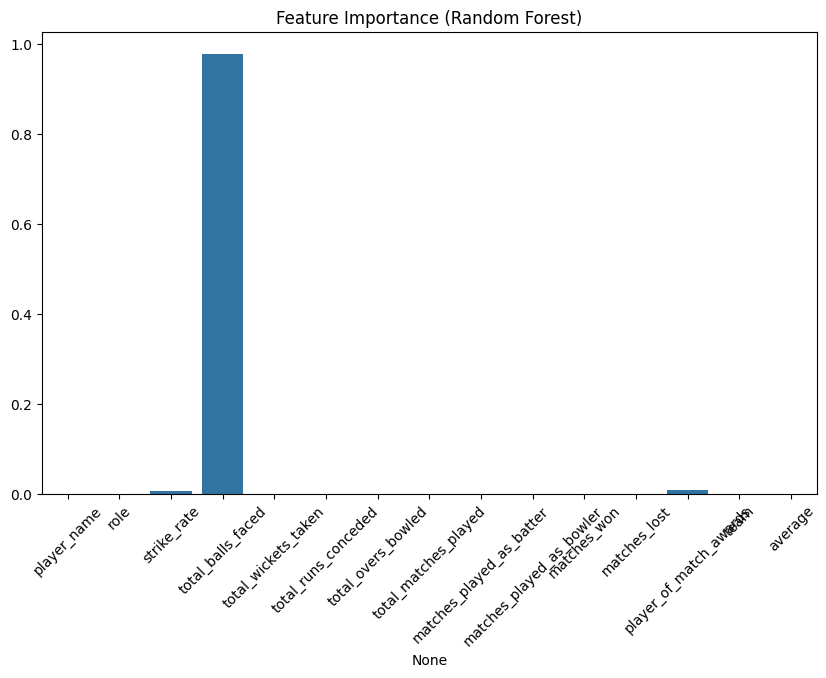


Random Forest Regression Metrics (No Outliers):
MSE: 1853.3794186440682
R2 Score: 0.9946404776653559


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis

# Load dataset
file_path = "C:/Users/udayk/Downloads/batter_player_stats.csv"  # Assuming it's in /content/data
df = pd.read_csv(file_path)

# Encode categorical columns if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Print Skewness and Kurtosis for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    print(f"Skewness of {col}: {skew(df[col])}")
    print(f"Kurtosis of {col}: {kurtosis(df[col])}")

# Splitting features and target
X = df.drop(columns=['total_runs'])  # Use actual target column
y = df['total_runs']

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1. Decision Tree Regressor**
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

### **2. Random Forest Regressor**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### **3. Linear Regression**
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### **4. Combined Regression Scatter Plot**
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Model Predictions vs Actual")
plt.legend()
plt.show()

### **5. Feature Importance (for Random Forest)**
plt.figure(figsize=(10, 6))
sns.barplot(x=df.drop(columns=['total_runs']).columns, y=rf_model.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Remove outliers
mean_runs = df['total_runs'].mean()
std_runs = df['total_runs'].std()
threshold = 2
outlier_indices = df[(df['total_runs'] > mean_runs + threshold * std_runs) |
                    (df['total_runs'] < mean_runs - threshold * std_runs)].index
df_no_outliers = df.drop(outlier_indices)

# Re-run model training and evaluation using df_no_outliers
X_no_outliers = df_no_outliers.drop(columns=['total_runs'])
y_no_outliers = df_no_outliers['total_runs']

# Encode categorical columns
for col in X_no_outliers.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        X_no_outliers[col] = label_encoders[col].transform(X_no_outliers[col])

# Impute the values
imputer_no_outliers = SimpleImputer(strategy='mean')
X_no_outliers = imputer_no_outliers.fit_transform(X_no_outliers)

# Split data again
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Retrain with the new dataset
rf_model_no_outliers = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_rf_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

# Evaluation
print("\nRandom Forest Regression Metrics (No Outliers):")
print("MSE:", mean_squared_error(y_test_no_outliers, y_pred_rf_no_outliers))
print("R2 Score:", r2_score(y_test_no_outliers, y_pred_rf_no_outliers))